
## Predicting the Sale Price of Bulldozers using Machine Learning 

THe data is downloaded and analysed from the Kaggle Bluebook for BUlldozers competition

## Data

The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are 3 main datasets:

Train.csv is the training set, which contains data through the end of 2011.
Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of this project check: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

Note: The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.

## Features
Kaggle provides a data dictionary detailing all of the features of the dataset. You can view this data dictionary on Google Sheets: https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [114]:
#Import training and save dataset
df  =pd.read_csv("data/TrainAndValid.csv",low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

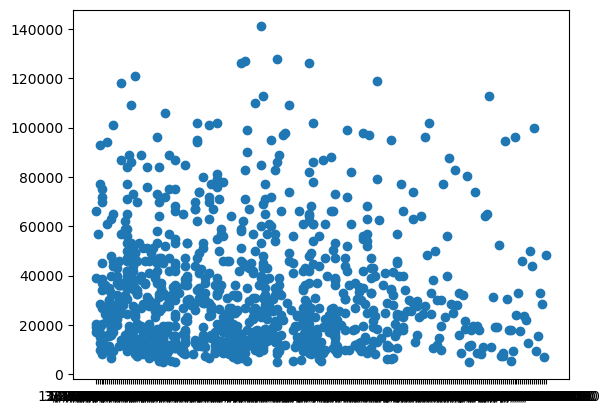

In [5]:
fig,ax = plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

<Axes: ylabel='Frequency'>

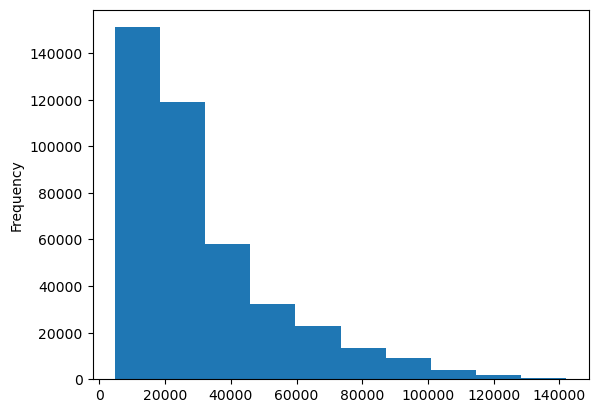

In [6]:
df.SalePrice.plot.hist()

## Parsing data


In [115]:

df = pd.read_csv("data/TrainAndValid.csv",low_memory=False,parse_dates=["saledate"])

In [8]:
df.saledate.dtype

dtype('<M8[ns]')

In [9]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

In [10]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


### Sort DataFrame by saledate

For this time series data we will sort the data based on the date of the sales

In [116]:
#Sort DataFrame in date order
df.sort_values(by=["saledate"],inplace=True,ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

## Make a copy of the original DataFrame
Making a copy of the original dataframe so when we manipulate the copy,we've still got our original data

In [138]:
# Make a copy
df_temp = df.copy()
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


### Add datetime paramters for saledate column

In [139]:
df_temp["saleyear"] = df_temp.saledate.dt.year
df_temp["saleMonth"] = df_temp.saledate.dt.month
df_temp["saleDay"] = df_temp.saledate.dt.day
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear,saleMonth,saleDay
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31


In [140]:
df_temp.drop("saledate",inplace=True,axis=1)

In [141]:
df_temp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

## Converting object datatypes to  integers

In [142]:
for label,content in df_temp.items():
    if pd.api.types.is_object_dtype(content):
        df_temp[label] = content.astype("category").cat.as_ordered()

In [143]:
df_temp.info()





<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 55 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [144]:
df_temp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [145]:
## Checking how mnay values are missing in the data

df_temp.isnull().sum()/len(df_temp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

In [132]:
## Filling numerical values
df_temp.drop("saledate",axis=1,inplace=True)

In [146]:
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
        

auctioneerID
MachineHoursCurrentMeter


In [147]:
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #Add a binary column which tells us if the data was missing or not
            df_temp[label+"is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            df_temp[label] = content.fillna(content.median())

In [148]:
# Checking if anuy null values are left
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [149]:
## Finding the labels of categorical datatype
for label,content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
            print(label)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [150]:
#Filling missing categorical values 
for label,content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_temp[label+"_is_missing"] = pd.isnull(content)
        df_temp[label] = pd.Categorical(content).codes + 1

In [163]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Columns: 101 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int32(3), int64(5), int8(40)
memory usage: 70.1 MB


In [54]:
#Checking if any missing value is left
df_temp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 101, dtype: int64

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


model = RandomForestRegressor(n_jobs=1,random_state=42)
model.fit(df_temp.drop("SalePrice",axis=1),df_temp["SalePrice"])


RandomForestRegressor(n_jobs=1, random_state=42)

In [57]:
model.score(df_temp.drop("SalePrice",axis=1),df_temp["SalePrice"])

0.9875132974990518

In [59]:
#Split the data into train and validation 
df_val = df_temp[df_temp.saleyear==2012]
df_train  = df_temp[df_temp.saleyear != 2012]

len(df_val),len(df_train)

(11573, 401125)

In [63]:
#Split data into x and y
x_train,y_train = df_train.drop("SalePrice",axis=1),df_train.SalePrice
x_valid,y_valid = df_val.drop("SalePrice",axis=1),df_val.SalePrice

In [64]:
model.score(x_valid,y_valid)

0.987018766243029

In [88]:
from sklearn.metrics import mean_squared_log_error,mean_absolute_error

#Creating a custom evaluation function(the kaggle competition uses RMSLE)
def rmsle(y_test,y_preds):
    """
    Calculate root mean squared log error between the predicitions and truth label 
    """
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

def show_scores(model):
    train_preds = model.predict(x_train)
    valid_preds = model.predict(x_valid)
    scores = {"Training MAE": mean_absolute_error(y_train,train_preds),
             "Valid MAE": mean_absolute_error(y_valid,valid_preds),
             "Training RMSLE":rmsle(y_train,train_preds),
             "Valid RMSLE":rmsle(y_valid,valid_preds),
             "Training R^2":model.score(x_train,y_train),
             "Valid R^2":model.score(x_valid,y_valid)}
    for label,content in scores.items():
        print(f"The {label} is {content}")

show_scores(model)



The Training MAE is 5530.530904705516
The Valid MAE is 7090.753389786572
The Training RMSLE is 0.25647273079766847
The Valid RMSLE is 0.2895513455735602
The Training R^2 is 0.8620882220528066
The Valid R^2 is 0.8346268881678072


## Testing our model on a subset(to tune the hyperparameters)

In [74]:
model = RandomForestRegressor(n_jobs=-1,random_state=42,max_samples=10000)
model

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [76]:

#Cutting down on the max number of samples each estimator can see improves training time
model.fit(x_train,y_train)


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [77]:
show_scores(model)

The Training MAE is 5530.530904705516
The Valid MAE is 7090.753389786572
The Training RMSLE is 0.25647273079766847
The Valid RMSLE is 0.2895513455735602


In [81]:
## Hyperparamter tuning with RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
rf_grid = {"n_estimators": np.arange(10,100,10),
          "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2),
           "max_features":[0.5,1,"sqrt","auto"],
          "max_samples":[10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),
                             param_distributions=rf_grid,
                             n_iter=5,
                             cv=5,
                             verbose=True)
rs_model.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\KIIT0001\Desktop\bulldozer-project\env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\KIIT0001\Desktop\bulldozer-project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\KIIT0001\Desktop\bulldozer-project\env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\KIIT0001\Desktop\bulldozer-project\env\Lib\site-packages\sklearn\base.py", line 666, in _validate_pa

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [83]:
rs_model.best_params_


{'n_estimators': 50,
 'min_samples_split': 18,
 'min_samples_leaf': 11,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [84]:
show_scores(rs_model)

The Training MAE is 6503.469959601774
The Valid MAE is 7828.089781775678
The Training RMSLE is 0.2921351191701609
The Valid RMSLE is 0.3151016698427192


### Train a model with the best hyperparameters


In [86]:
## Most idea hyperparamters
ideal_model = RandomForestRegressor(n_estimators=40,min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features=0.5,n_jobs=-1,max_samples=None,random_state=42)
ideal_model.fit(x_train,y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1)

In [89]:
show_scores(ideal_model)

The Training MAE is 3010.235349719289
The Valid MAE is 5907.9024568806435
The Training RMSLE is 0.1466528767468344
The Valid RMSLE is 0.2432916212587095
The Training R^2 is 0.9575074454818984
The Valid R^2 is 0.8823109725893891


## Make predicition on test data

In [179]:
#Import the test data
df_test = pd.read_csv("data/Test.csv",low_memory=False,parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [180]:
df.saledate.info()

<class 'pandas.core.series.Series'>
Index: 412698 entries, 205615 to 409203
Series name: saledate
Non-Null Count   Dtype         
--------------   -----         
412698 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 6.3 MB


### Preprocessing our test data(getting the test dataset in the same format as our training dataset)


In [181]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    df["saleyear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day

    
    df.drop("saledate", axis=1, inplace=True)
    df["auctioneerIDis_missing"] = False
    
    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not
                df[label+"is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
    
        # Filled categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1
    
    return df

df_temp_test = preprocess_data(df_test)
df_temp_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 100 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SalesID                             12457 non-null  int64  
 1   MachineID                           12457 non-null  int64  
 2   ModelID                             12457 non-null  int64  
 3   datasource                          12457 non-null  int64  
 4   auctioneerID                        12457 non-null  int64  
 5   YearMade                            12457 non-null  int64  
 6   MachineHoursCurrentMeter            12457 non-null  float64
 7   UsageBand                           12457 non-null  int8   
 8   fiModelDesc                         12457 non-null  int16  
 9   fiBaseModel                         12457 non-null  int16  
 10  fiSecondaryDesc                     12457 non-null  int8   
 11  fiModelSeries                       1245

In [183]:
#Other way of finding whata is different between two sets
set(x_train.columns) - set(df_temp_test.columns)

set()

In [182]:

df_temp_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 100 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SalesID                             12457 non-null  int64  
 1   MachineID                           12457 non-null  int64  
 2   ModelID                             12457 non-null  int64  
 3   datasource                          12457 non-null  int64  
 4   auctioneerID                        12457 non-null  int64  
 5   YearMade                            12457 non-null  int64  
 6   MachineHoursCurrentMeter            12457 non-null  float64
 7   UsageBand                           12457 non-null  int8   
 8   fiModelDesc                         12457 non-null  int16  
 9   fiBaseModel                         12457 non-null  int16  
 10  fiSecondaryDesc                     12457 non-null  int8   
 11  fiModelSeries                       1245

In [170]:
df_temp_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 100 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SalesID                             12457 non-null  int64  
 1   MachineID                           12457 non-null  int64  
 2   ModelID                             12457 non-null  int64  
 3   datasource                          12457 non-null  int64  
 4   auctioneerID                        12457 non-null  int64  
 5   YearMade                            12457 non-null  int64  
 6   MachineHoursCurrentMeter            12457 non-null  float64
 7   UsageBand                           12457 non-null  int8   
 8   fiModelDesc                         12457 non-null  int16  
 9   fiBaseModel                         12457 non-null  int16  
 10  fiSecondaryDesc                     12457 non-null  int8   
 11  fiModelSeries                       1245

In [175]:
df_temp.columns[:90]

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleyear', 'saleMonth',
       'saleDay', 'auctioneerIDis_missing',
       'MachineHours

In [185]:
# # Make predicition on the test dataset
test_preds=ideal_model.predict(df_temp_test)
test_preds

array([16099.11463217, 16078.27129684, 50445.50670933, ...,
       13364.16921362, 17735.04266878, 27545.94071445])

In [186]:
# Formate predicitions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["SalesID"]= df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds


,SalesID,SalesPrice
0,1227829,16099.114632
1,1227844,16078.271297
2,1227847,50445.506709
3,1227848,76240.860777
4,1227863,55782.249385
...,...,...
12452,6643171,39643.004909
12453,6643173,13418.857213
12454,6643184,13364.169214
12455,6643186,17735.042669


In [188]:
df_preds.to_csv("data/test_prediction.csv",index=False)

In [203]:
 ideal_model.feature_importances_

array([3.61593615e-02, 1.75902934e-02, 3.93223920e-02, 1.99916404e-03,
       3.75356405e-03, 2.15427455e-01, 3.35522099e-03, 1.09601102e-03,
       3.81244503e-02, 6.28852754e-02, 5.98197364e-02, 4.31526918e-03,
       2.09454924e-02, 1.45428413e-01, 4.33503381e-02, 6.72780833e-03,
       2.29066572e-03, 3.54079884e-03, 2.93113305e-03, 4.65117914e-02,
       4.45623236e-04, 1.16147466e-04, 1.63448440e-03, 2.19871552e-04,
       1.20600874e-03, 1.24280223e-04, 1.97650211e-03, 8.15494972e-03,
       2.35630917e-03, 4.80231616e-04, 3.56008478e-03, 2.14796333e-03,
       2.99193748e-03, 1.83686165e-03, 3.12389648e-04, 6.84342839e-03,
       1.03355288e-03, 1.07017098e-02, 1.52437548e-03, 1.51306482e-03,
       1.45348394e-03, 8.76344982e-04, 3.56128138e-03, 6.25932066e-04,
       5.95813766e-04, 3.63502694e-04, 2.38571925e-04, 2.27345821e-03,
       9.20121317e-04, 2.50048718e-04, 1.64786579e-04, 7.29179619e-02,
       7.92067668e-03, 6.56677651e-03, 2.84730504e-04, 1.83933796e-03,
      

In [216]:
# Helper function for plotting feature importance
def plot_features(columns,importances,n=20):
    df = (pd.DataFrame({"features":columns,
                       "features_importances":importances})
          .sort_values("features_importances",ascending=False)
          .reset_index(drop=True))
    # Plot the datarame
    fix,ax= plt.subplots()
    ax.barh(df["features"][:n],df["features_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    plt.plot()
    

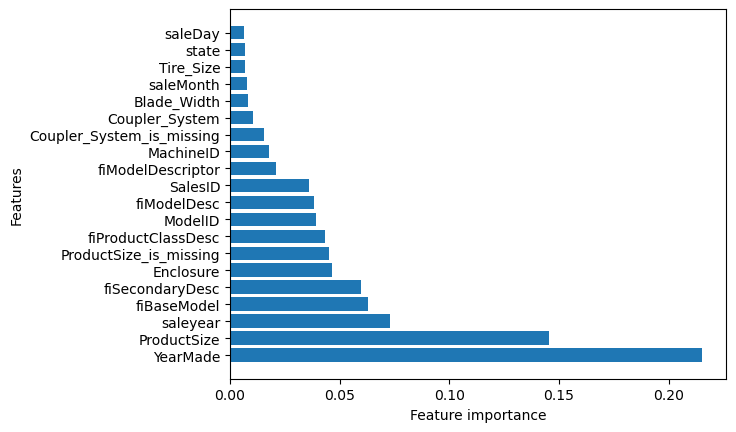

In [217]:
plot_features(x_train.columns,ideal_model.feature_importances_)
